# 2018 분석 박병준

In [25]:
# 모듈
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc

In [26]:
# 폰트 등록
FONT_PATH = '../Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=FONT_PATH).get_name()
rc('font', family=font_name)
# 그래프의 한글 텍스트가 깨지지 않기 위함.

## 소방청 연간화재통계 2015 ~ 2019 통합파일 읽어오기

In [27]:
DIR_PATH='../Data/'
FILE_NAME=DIR_PATH + 'fire_allyear.csv'
FIRE=pd.read_csv(FILE_NAME, encoding='cp949') # 'KOR_EUC' 상위호환
FIRE

,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
0,2015,1,심야,경상남도,"건축,구조물",작동기기,전기적 요인,"전기,전자",주거,0,0,0,2920
1,2015,1,심야,서울특별시,임야,"담뱃불, 라이터불",부주의,기타,임야,0,0,0,0
2,2015,1,심야,서울특별시,"자동차,철도차량","담뱃불, 라이터불",부주의,"침구,직물류","자동차,철도차량",0,0,0,137
3,2015,1,심야,서울특별시,"건축,구조물","담뱃불, 라이터불",부주의,"종이,목재,건초등","판매,업무시설",0,0,0,326
4,2015,1,심야,부산광역시,"건축,구조물",작동기기,부주의,식품,주거,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214462,2019,12,저녁,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자",산업시설,0,0,0,23707
214463,2019,12,저녁,경상북도,"건축,구조물",미상,미상,"종이,목재,건초등",산업시설,0,0,0,3542
214464,2019,12,저녁,부산광역시,"건축,구조물",작동기기,부주의,식품,"판매,업무시설",0,0,0,0
214465,2019,12,저녁,제주특별자치도,"건축,구조물",작동기기,부주의,합성수지,"판매,업무시설",0,0,0,105


## 소방청 연간화재통계 2018년 데이터 추출하기

In [5]:
# yearIndex = FIRE.set_index('년')
# fire2018 = yearIndex.loc[2018]
# fire2018

In [29]:
year2018 = FIRE[ FIRE['년']==2018 ]

# year2018 = year2018.iloc[:, 1:]          # Unnamed: 0 -> 없애기 위해
year2018['년'] = year2018['년'].astype(str)    # count(), sum(), value_counts() 등 DF메서드를 사용할 때
year2018['월'] = year2018['월'].astype(str)    # '년', '월'이 무의미하게 더해지는 것을 막기 위함.
year2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42338 entries, 132026 to 174363
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   년          42338 non-null  object
 1   월          42338 non-null  object
 2   시간대        42338 non-null  object
 3   시도         42338 non-null  object
 4   화재유형       42338 non-null  object
 5   발화열원대분류    42338 non-null  object
 6   발화요인대분류    42338 non-null  object
 7   최초착화물대분류   42338 non-null  object
 8   장소대분류      42338 non-null  object
 9   사망         42338 non-null  int64 
 10  부상         42338 non-null  int64 
 11  인명피해(명)소계  42338 non-null  int64 
 12  재산피해소계     42338 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 4.5+ MB


C:\Users\whrjs\AppData\Local\Temp\ipykernel_20440\3816624230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2018['년'] = year2018['년'].astype(str)    # count(), sum(), value_counts() 등 DF메서드를 사용할 때
C:\Users\whrjs\AppData\Local\Temp\ipykernel_20440\3816624230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2018['월'] = year2018['월'].astype(str)    # '년', '월'이 무의미하게 더해지는 것을 막기 위함.


In [84]:
year2018.isnull().sum()

년            0
월            0
시간대          0
시도           0
화재유형         0
발화열원대분류      0
발화요인대분류      0
최초착화물대분류     0
장소대분류        0
사망           0
부상           0
인명피해(명)소계    0
재산피해소계       0
dtype: int64

# 2018년 시/도별 화재건수 => 경기도

In [30]:
State = pd.DataFrame( year2018['시도'].value_counts().sort_values(ascending=False) )
State
# year2018의 데이터 값에 대한 갯수를 구하고, 정렬 -> DataFrame으로 보기좋게 묶음.

,시도
경기도,9632
서울특별시,6368
경상남도,3482
경상북도,2686
전라남도,2635
충청남도,2605
부산광역시,2471
강원도,2228
전라북도,2044
인천광역시,1620


In [43]:
a = State.mean()
a = a.values[0]
a

2490.470588235294

<Figure size 576x576 with 0 Axes>

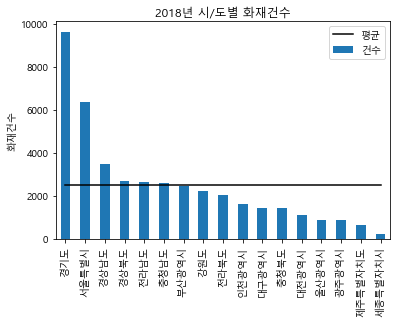

In [93]:
plt.figure(figsize=(8,8))
State.plot(kind='bar')
# 그래프 막대 색깔 바꾸기 실패
plt.ylabel('화재건수')                  
plt.title('2018년 시/도별 화재건수')
plt.plot([a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a,a],color='black')
plt.legend(['평균','건수'])

plt.show()

# 2018년 월별 화재건수 => 겨울

In [47]:
fireMonth = pd.DataFrame( year2018['월'].value_counts() )
fireMonth

,월
2,4632
1,4083
12,3937
3,3875
4,3714
8,3690
6,3441
7,3409
10,3048
5,3038


In [48]:
b = pd.DataFrame( fireMonth.mean() )
b

,0
월,3528.166667


<function matplotlib.pyplot.show(close=None, block=None)>

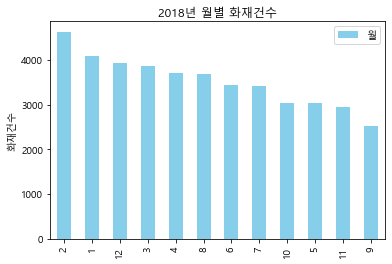

In [49]:
fireMonth.plot(kind='bar', color='skyblue')
plt.ylabel('화재건수')                  
plt.title('2018년 월별 화재건수')
plt.show

# 2018년 화재의 시간대 => 낮

In [50]:
fireTime = year2018.groupby('시간대').count()['년']
pd.DataFrame(fireTime)

,년
시간대,
낮,15419
심야,6105
아침,10183
저녁,10631


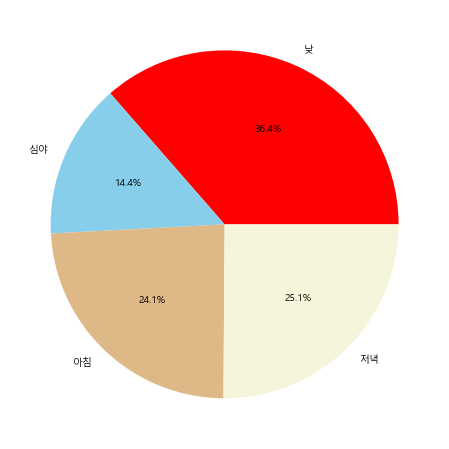

In [51]:
plt.figure(figsize=(8,8))
plt.pie(fireTime, labels = fireTime.index, autopct = '%.1f%%',colors=['red','skyblue','burlywood','beige'])
plt.show()

In [52]:
fireTime

시간대
낮     15419
심야     6105
아침    10183
저녁    10631
Name: 년, dtype: int64

# 2018년 화재의 유형 => 건축, 구조물

In [53]:
fireType = pd.DataFrame( year2018['화재유형'].value_counts() )
fireType

,화재유형
"건축,구조물",28013
기타(쓰레기 화재등),6847
"자동차,철도차량",5067
임야,2258
"선박,항공기",116
"위험물,가스제조소등",37


In [54]:
d = pd.DataFrame( fireType.mean() )
d

,0
화재유형,7056.333333


<function matplotlib.pyplot.show(close=None, block=None)>

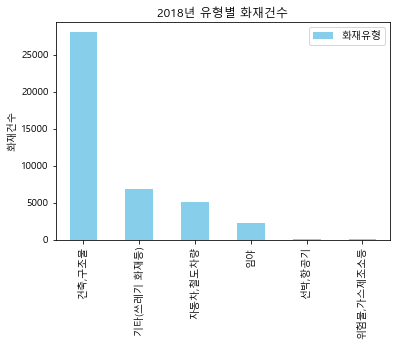

In [55]:
fireType.plot(kind='bar', color='skyblue')
plt.ylabel('화재건수')                  
plt.title('2018년 유형별 화재건수')                                           
plt.show

# 2018년 발화열원대분류 => 작동기기

In [56]:
hitPoint = pd.DataFrame( year2018['발화열원대분류'].value_counts() )
hitPoint

,발화열원대분류
작동기기,17942
"담뱃불, 라이터불",8048
"불꽃, 불티",7650
미상,4286
"마찰, 전도, 복사",3094
기타,558
화학적 발화열,491
자연적 발화열,225
"폭발물, 폭죽",44


In [82]:
e = hitPoint.mean()
e = e.values[0]
e

4704.222222222223

<function matplotlib.pyplot.show(close=None, block=None)>

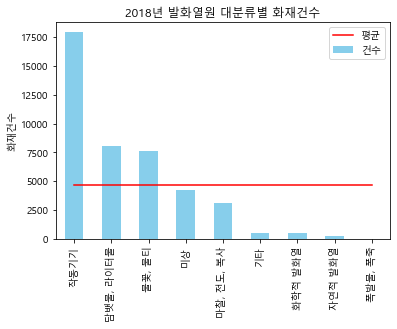

In [92]:
hitPoint.plot(kind='bar', color='skyblue')
plt.ylabel('화재건수')                  
plt.title('2018년 발화열원 대분류별 화재건수')  
plt.plot([e,e,e,e,e,e,e,e,e],color='r')
plt.legend(['평균','건수'])
plt.show

# 2018년 발화요인대분류 => 부주의, 전기적 요인

In [62]:
source = pd.DataFrame( year2018['발화요인대분류'].value_counts() )
source

,발화요인대분류
부주의,20352
전기적 요인,10471
기계적 요인,4619
미상,4037
화학적 요인,604
교통사고,505
방화의심,470
방화,447
기타,372
자연적인 요인,250


<function matplotlib.pyplot.show(close=None, block=None)>

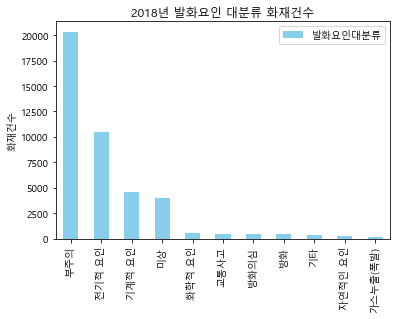

In [63]:
source.plot(kind='bar', color='skyblue')
plt.ylabel('화재건수')                  
plt.title('2018년 발화요인 대분류 화재건수')                                           
plt.show

# 2018년 최초착화물대분류 => 종이 등 발화제, 전지 및 전자

In [64]:
fireFirst = pd.DataFrame( year2018['최초착화물대분류'].value_counts() )
fireFirst

,최초착화물대분류
"종이,목재,건초등",9755
"전기,전자",9332
합성수지,4940
쓰레기류,4430
식품,3320
미상,3219
기타,2087
"자동차,철도차량,선박,항공기",2081
"침구,직물류",1513
위험물등,939


<function matplotlib.pyplot.show(close=None, block=None)>

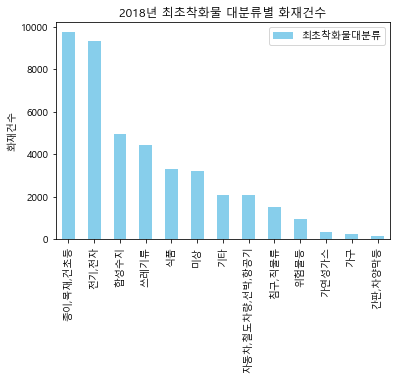

In [65]:
fireFirst.plot(kind='bar', color='skyblue')
plt.ylabel('화재건수')                  
plt.title('2018년 최초착화물 대분류별 화재건수')                                           
plt.show

# 2018년 장소대분류 => 주거 및 산업시설

In [66]:
firePlace = pd.DataFrame( year2018['장소대분류'].value_counts() )
firePlace

,장소대분류
주거,12002
기타,6847
산업시설,5896
"자동차,철도차량",5067
생활서비스,4361
"판매,업무시설",2598
임야,2258
기타서비스,1692
"의료,복지시설",417
집합시설,385


<function matplotlib.pyplot.show(close=None, block=None)>

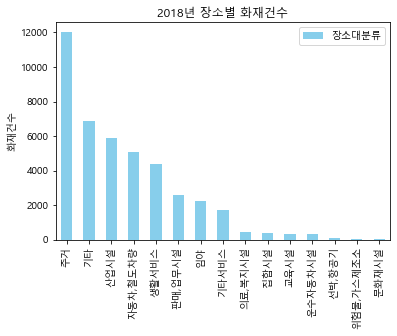

In [67]:
firePlace.plot(kind='bar', color='skyblue')
plt.ylabel('화재건수')                  
plt.title('2018년 장소별 화재건수')                                           
plt.show

###### 2018년 사망건수(명)

In [68]:
# # 사망건수 0인 경우 => 42060명
# result = year2018.사망 != 0
# year2018 = year2018[result]
# DeathCount = pd.DataFrame( year2018['사망'].value_counts(), )
# DeathCount

###### 2018년 부상건수(명)

In [69]:
# # # 부상이 0인 경우 => 40905명
# result = year2018.부상 != 0
# year2018 = year2018[result]
# Injury = pd.DataFrame( year2018['부상'].value_counts() )
# Injury

###### 2018년 인명피해 건수(명)

In [70]:
# pd.DataFrame( year2018['인명피해(명)소계'].value_counts() )

###### 2018년 재산피해소계()

In [71]:
# property = pd.DataFrame( year2018['재산피해소계'].value_counts() )
# property

# 사망, 부상, 인명피해
## - 사망, 부상, 인명피해 <=> 발화요인, 발화열원, 발화유형

In [72]:
# pd.DataFrame( year2018.groupby(['발화열원대분류']).sum()['재산피해소계'].sort_values() )

In [73]:
year2018.groupby(['발화요인대분류']).sum().sort_values('인명피해(명)소계', ascending=False)

,사망,부상,인명피해(명)소계,재산피해소계
발화요인대분류,,,,
부주의,70,798,868,124688688
전기적 요인,87,466,553,119960816
미상,102,384,486,233286755
방화,46,130,176,7510373
가스누출(폭발),5,128,133,2811299
기계적 요인,7,114,121,38659233
방화의심,31,80,111,2438577
화학적 요인,7,66,73,18703578
기타,5,31,36,4723504


In [74]:
year2018.groupby(['발화열원대분류']).sum().sort_values('인명피해(명)소계', ascending=False)

,사망,부상,인명피해(명)소계,재산피해소계
발화열원대분류,,,,
작동기기,118,829,947,162740670
미상,126,433,559,233655534
"담뱃불, 라이터불",69,412,481,26356218
"불꽃, 불티",41,338,379,91388265
"마찰, 전도, 복사",8,145,153,26375812
기타,5,35,40,3860593
화학적 발화열,2,31,33,13559349
자연적 발화열,0,1,1,1741267
"폭발물, 폭죽",0,1,1,34681


In [75]:
year2018.groupby(['화재유형']).sum().sort_values('인명피해(명)소계', ascending=False)

,사망,부상,인명피해(명)소계,재산피해소계
화재유형,,,,
"건축,구조물",316,1915,2231,495040348
"자동차,철도차량",28,132,160,32480219
기타(쓰레기 화재등),13,81,94,6727101
임야,11,67,78,7763534
"선박,항공기",0,20,20,9569820
"위험물,가스제조소등",1,10,11,8131367


# 경기도 발화요인

In [76]:
Gyeonggi = year2018[year2018['시도']=='경기도']
# Gyeonggi = pd.DataFrame( Gyeonggi.value_counts().sort_values(ascending=False) )
Gyeonggi

,년,월,시간대,시도,화재유형,발화열원대분류,발화요인대분류,최초착화물대분류,장소대분류,사망,부상,인명피해(명)소계,재산피해소계
132026,2018,1,심야,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자",주거,0,1,1,24099
132028,2018,1,심야,경기도,임야,"담뱃불, 라이터불",부주의,"종이,목재,건초등",임야,0,0,0,28
132033,2018,1,심야,경기도,기타(쓰레기 화재등),작동기기,전기적 요인,"전기,전자",기타,0,0,0,316
132049,2018,1,심야,경기도,"건축,구조물",미상,방화의심,합성수지,주거,0,0,0,215
132052,2018,1,심야,경기도,"건축,구조물",작동기기,기계적 요인,"종이,목재,건초등",주거,0,0,0,4811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174316,2018,12,낮,경기도,기타(쓰레기 화재등),"담뱃불, 라이터불",부주의,"종이,목재,건초등",기타,0,0,0,7658
174320,2018,12,저녁,경기도,"건축,구조물",작동기기,기계적 요인,"종이,목재,건초등",주거,0,0,0,345
174333,2018,12,저녁,경기도,"건축,구조물","불꽃, 불티",부주의,쓰레기류,산업시설,0,0,0,15
174353,2018,12,저녁,경기도,"건축,구조물",작동기기,전기적 요인,"전기,전자",생활서비스,0,0,0,229


In [77]:
# Gyeonggi.drop( ['년','시도'], axis=1, inplace=True )
# G2 = Gyeonggi.set_index('발화요인대분류')

In [78]:
# G2.sort_index(ascending=False)

In [79]:
G2 = Gyeonggi.groupby(['발화요인대분류']).sum().sort_values('인명피해(명)소계', ascending=False)
G2

,사망,부상,인명피해(명)소계,재산피해소계
발화요인대분류,,,,
부주의,11,211,222,82570512
미상,14,94,108,96399574
전기적 요인,8,94,102,53216597
기계적 요인,2,57,59,18807187
방화,15,23,38,3406751
가스누출(폭발),2,19,21,744377
화학적 요인,2,19,21,10054587
방화의심,6,11,17,859805
기타,0,7,7,2145377
